# Aquisition

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('train_labels.csv', sep =',')
test = pd.read_csv('test_labels.csv', sep =',')

In [3]:
test.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,R0010724-11.png,1792,1344,socket,604,188,775,371
1,R0010729-11.png,1792,1344,double socket,907,217,1102,351
2,R0010729-11.png,1792,1344,double socket,652,234,873,356
3,R0010732-11.png,1792,1344,double socket,409,522,671,667
4,R0010732-11.png,1792,1344,double socket,705,568,1003,674


In [4]:
#Determine number of raw images that contributed tiles tiles in this dataset
lit = train['filename'].tolist()
a = test['filename'].tolist()
lit = lit + a

new_lit = []
for i in lit:
    new_lit.append(i[:-7])

    
def unique(list1): 
    list_set = set(list1) 
    unique_list = (list(list_set)) 
    return(unique_list) 
        
len(unique(new_lit))

249

# Analysis

### Sizes of objects of different classes

In [5]:
def addAreaColum(df):
    df['size']=(df['ymax']-df['ymin'])*(df['xmax']-df['xmin'])
    return df

In [6]:
train_df = addAreaColum(train)
test_df = addAreaColum(test)
# train_df = new_df[new_df['class'] == 'double socket'] if you want to analyse a class
# train_df.size

,width,height,xmin,ymin,xmax,ymax,size
count,345.0,345.0,345.000000,345.000000,345.000000,345.000000,345.000000
mean,1792.0,1344.0,735.472464,333.084058,998.005797,512.985507,70304.852174
std,0.0,0.0,373.961655,270.406609,382.022814,264.648532,122048.391244
min,1792.0,1344.0,1.000000,1.000000,44.000000,54.000000,702.000000
25%,1792.0,1344.0,524.000000,140.000000,819.000000,333.000000,10990.000000
50%,1792.0,1344.0,750.000000,242.000000,995.000000,460.000000,25254.000000
75%,1792.0,1344.0,895.000000,509.000000,1184.000000,680.000000,52850.000000
max,1792.0,1344.0,1712.000000,1262.000000,1792.000000,1344.000000,804138.000000


In [16]:
dataset_df = train_df.append(test_df)
#determine the upper third, lower third and centre tertiles
dataset_df.quantile(0.6666666666666666666666)

width      1792.000000
height     1344.000000
xmin        834.000000
ymin        370.666667
xmax       1113.000000
ymax        600.333333
size      42917.333333
Name: 0.6666666666666666, dtype: float64

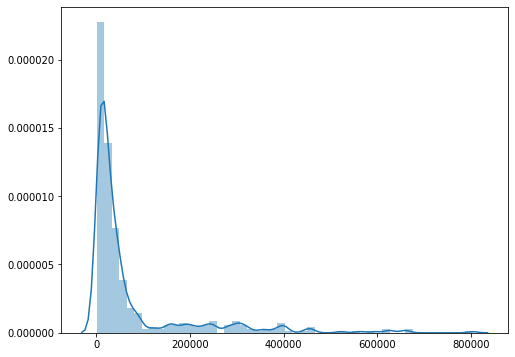

In [13]:
dist = dataset_df['size'].tolist()
fig, ax = plt.subplots(figsize=(8, 6))
plt.ylabel('Mean Area')
ax = sns.distplot(dist, ax = ax)

### Distribution piechart of objects in dataset

In [7]:
def pltDistribution(dflist):
    labels = 'Socket', 'Double Socket', 'Radiator'
    s = 0
    ds = 0
    r = 0
    
    for z in dflist:
        for i in z['class']:
            if i == 'socket':
                s = s+1
            elif i == 'double socket':
                ds = ds+1
            else:
                r = r+1
    count = [s, ds, r]
    print(ds+s+r)
    
    fig, ax = plt.subplots()
    ax.pie(count, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax.axis('equal')

#     plt.show()
    plt.savefig('Fig24.png')

In [8]:
def pltDistribution2(df):
    labels = 'Socket', 'Double Socket', 'Radiator'
    s = 0
    ds = 0
    r = 0
    
    for i in df['class']:
        if i == 'socket':
            s = s+1
        elif i == 'double socket':
            ds = ds+1
        else:
            r = r+1
    count = [s, ds, r]
    print(r)
    
    fig, ax = plt.subplots()
    ax.pie(count, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax.axis('equal')

#     plt.show()
    plt.savefig('Fig24.png')

438


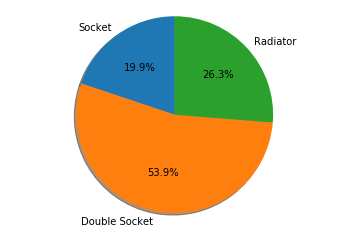

In [9]:
input = [train, test]
pltDistribution(input)
# pltDistribution2(train)

### Bar chart of mean area of each class

In [36]:
def pltMeanSize(dflist):
    sizes = [0,0,0,0]
    count = [0,0,0,0]
    classes = ['Socket', 'Double Socket', 'Radiator']
    
    for z in dflist:
        for index, row in z.iterrows(): #itterows
            if row['class'] == 'socket':
                sizes[0] = sizes[0] + row['size']
                count[0] = count[0] + 1
            if row['class'] == 'double socket':
                sizes[1] = sizes[1] + row['size']
                count[1] = count[1] + 1
            if row['class'] == 'radiator':
                sizes[3] = sizes[3] + row['size']
                count[3] = count[3] + 1
                
                
    arealist = [sizes[0]/count[0], sizes[1]/count[1], sizes[3]/count[3]]   
    print(count)
    fig, ax = plt.subplots()
    ax.bar(classes, arealist)
    plt.ylabel('Mean Area')
#     plt.show()
    plt.savefig('Fig37.png')

[20, 236, 0, 33]


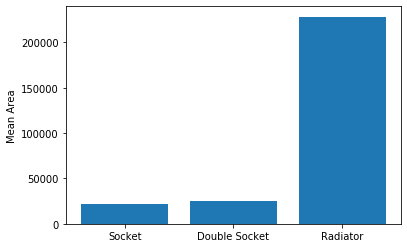

In [24]:
input3 = [train_df, test_df]
pltMeanSize(input3)